C:\Users\avina\AppData\Local\Temp\ipykernel_8152\2073070758.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022", y="Country Code", data=total_top_ten_countries, palette="magma", ax=axes[0, 0])
C:\Users\avina\AppData\Local\Temp\ipykernel_8152\2073070758.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022", y="Country Code", data=total_bottom_ten_countries, palette="cividis", ax=axes[0, 1])
C:\Users\avina\AppData\Local\Temp\ipykernel_8152\2073070758.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022", y="Country Co

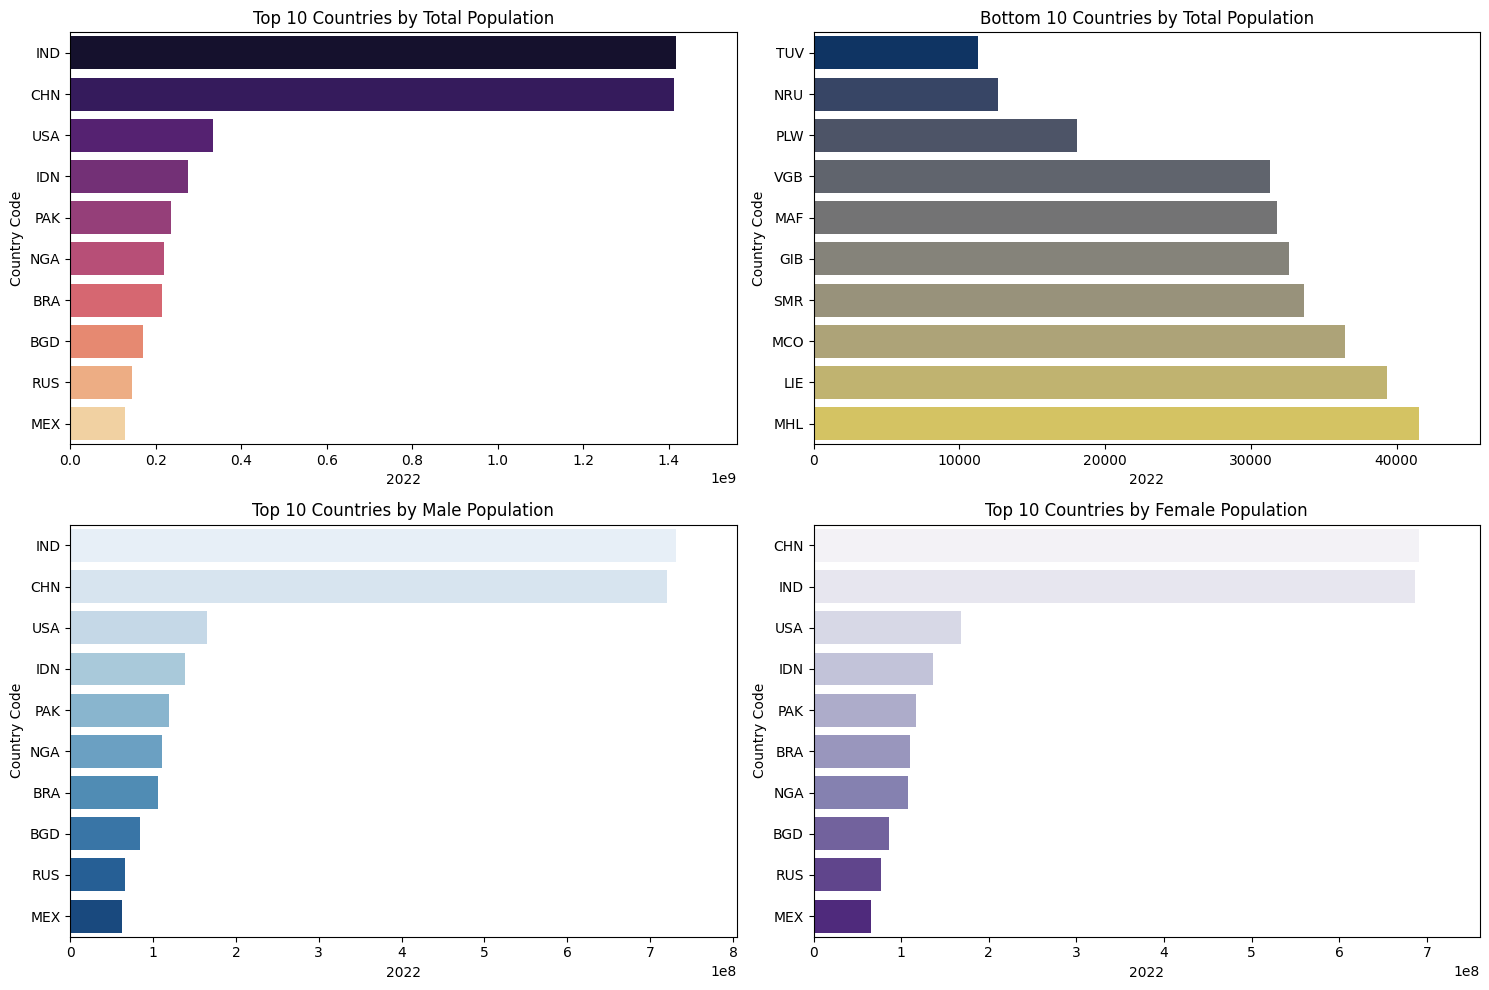

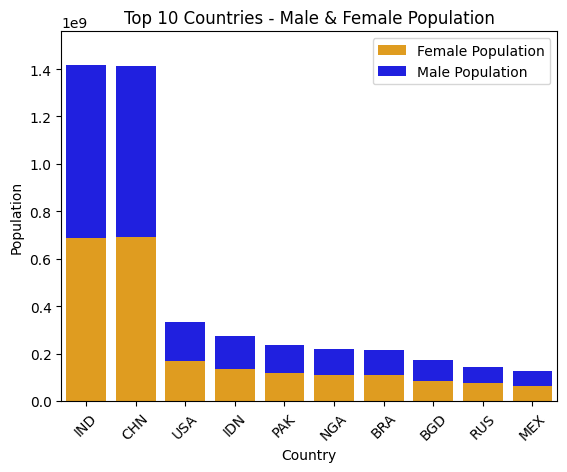

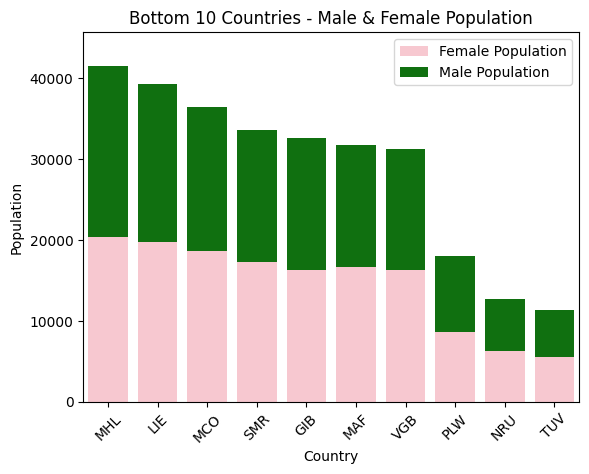

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\avina\Downloads\worldpopulationdata (1).csv")
df.drop(['Series Name', 'Country Name'], axis=1, inplace=True)

total_population_data = df[df['Series Code'] == 'SP.POP.TOTL']
total_top_ten_countries = total_population_data.sort_values(by="2022", ascending=False).head(10)
total_bottom_ten_countries = total_population_data.sort_values(by="2022", ascending=True).head(10)

male_population_data = df[df['Series Code'] == 'SP.POP.TOTL.MA.IN']
male_top_ten_countries = male_population_data.sort_values(by="2022", ascending=False).head(10)

female_population_data = df[df['Series Code'] == 'SP.POP.TOTL.FE.IN']
female_top_ten_countries = female_population_data.sort_values(by="2022", ascending=False).head(10)

merge_data = pd.merge(male_population_data, female_population_data, on="Country Code", suffixes=("_male", "_female"))
merge_data["Total population"] = merge_data["2022_male"] + merge_data["2022_female"]
sorted_data = merge_data.sort_values(by="Total population", ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x="2022", y="Country Code", data=total_top_ten_countries, palette="magma", ax=axes[0, 0])
axes[0, 0].set_title("Top 10 Countries by Total Population")
axes[0, 0].set_xlim(0, total_top_ten_countries["2022"].max() * 1.1)

sns.barplot(x="2022", y="Country Code", data=total_bottom_ten_countries, palette="cividis", ax=axes[0, 1])
axes[0, 1].set_title("Bottom 10 Countries by Total Population")
axes[0, 1].set_xlim(0, total_bottom_ten_countries["2022"].max() * 1.1)

sns.barplot(x="2022", y="Country Code", data=male_top_ten_countries, palette="Blues", ax=axes[1, 0])
axes[1, 0].set_title("Top 10 Countries by Male Population")
axes[1, 0].set_xlim(0, male_top_ten_countries["2022"].max() * 1.1)

sns.barplot(x="2022", y="Country Code", data=female_top_ten_countries, palette="Purples", ax=axes[1, 1])
axes[1, 1].set_title("Top 10 Countries by Female Population")
axes[1, 1].set_xlim(0, female_top_ten_countries["2022"].max() * 1.1)

plt.tight_layout()
plt.show()

top_10_countries = sorted_data.head(10)
sns.barplot(x="Country Code", y="2022_female", data=top_10_countries, color="orange", label="Female Population")
sns.barplot(x="Country Code", y="2022_male", data=top_10_countries, bottom=top_10_countries["2022_female"], color="blue", label="Male Population")
plt.legend()
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Top 10 Countries - Male & Female Population")
plt.ylim(0, top_10_countries["Total population"].max() * 1.1)
plt.show()

bottom_10_countries = sorted_data.tail(10)
sns.barplot(x="Country Code", y="2022_female", data=bottom_10_countries, color="pink", label="Female Population")
sns.barplot(x="Country Code", y="2022_male", data=bottom_10_countries, bottom=bottom_10_countries["2022_female"], color="green", label="Male Population")
plt.legend()
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Bottom 10 Countries - Male & Female Population")
plt.ylim(0, bottom_10_countries["Total population"].max() * 1.1)
plt.show()
